# HW5: Prob 1: Create a 2D embedding of the CIFAR-10 comparing different manifold learning algorithms

The [CIFAR-10](https://www.cs.toronto.edu/~kriz/cifar.html) is not that unlike the MNIST data set in that it is is 6K instances of small images. Unlike MNIST they are color images which are 32x32x3 (32 pixels wide, 32 pixels high, 3 color channels). The 3 color channels are red, green and blue. Each pixel is represented by a number between 0 and 255. The data set is divided into 10 classes. The classes are airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck. The data set is available in the keras.datasets module. You can load it with the following code:

```python
from torchvision.datasets import CIFAR10
dataset = CIFAR10(root='data/', download=True, transform=ToTensor())
test_dataset = CIFAR10(root='data/', train=False, transform=ToTensor())
```

Your goal is to compare different manifold learning algorithms on this data set. You should use the following algorithms:

* Principle Component Analysis
* Isomap Embedding
* Locally Linear Embedding
* Multidimensional scaling.
* SpectralEmbedding
* T-distributed Stochastic Neighbor Embedding

All of these algorithms are available in the sklearn library. In addition you should use also try the UMAP algorithm which is available for python as a library [umap](https://umap-learn.readthedocs.io/en/latest/basic_usage.html). In each of these cases you should project the data into 2D and color the data by the class in which it belongs.

Two references which might help the [sklearn documentation](https://scikit-learn.org/stable/modules/manifold.html) and Jake Vanderplas' book [Python Data Science Handbook](https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html).

Practice creating a well formatted Jupyter notebook. You should have a title, a description of the data set, a description of the algorithms, a description of the results, and a discussion of the results. You should also have a conclusion. Your notebook should not have lots of code cells with no explanation. It should also not have lots of text outputs. You may need that during your development but by the time you submit, please clean it up.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.datasets import CIFAR10
import torchvision.transforms as transforms
import torch

In [ ]:
# Define the transformation
transform = transforms.Compose([transforms.ToTensor()])

# Load the dataset with the defined transformation
dataset = CIFAR10(root='data/', download=True, transform=transform)
test_dataset = CIFAR10(root='data/', train=False, transform=transform)


Files already downloaded and verified


In [ ]:
print(len(dataset), len(test_dataset), len(dataset.targets))

50000 10000 50000


Ploting 100 images of dataset, according to features and clases, the total images are 50000

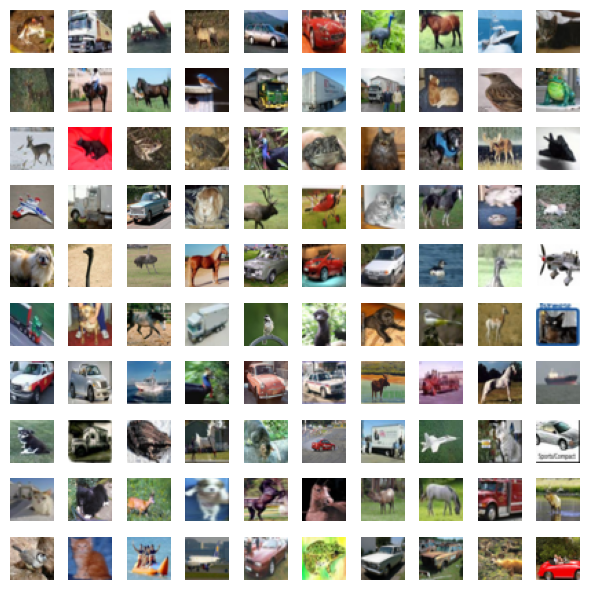

In [ ]:
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(dataset[idx][0].permute(1, 2, 0))  # Accessing the image tensor and permuting dimensions for display
    ax.axis("off")
plt.tight_layout()
plt.show()

Because the dataset is too large, the RAM cannot perform the operations

requested for the manifold, therefore we will work with a dataset reduced to

15000 images

In [ ]:
# Reduce the dataset size
subset_size = 15000  # Set the desired subset size
subset_indices = np.random.choice(len(dataset), subset_size, replace=False)
subset_data = torch.utils.data.Subset(dataset, range(subset_size))

targets = np.array([dataset.targets[i] for i in subset_indices])
print(np.unique(targets))

[0 1 2 3 4 5 6 7 8 9]


For each sample, it converts the image tensor x[0] into a NumPy array and flattens it into a one-dimensional array.

Define number of components to reduce the dimensionality and n_neighbors based on some distance metric

In [ ]:
# Flatten the images
X = np.array([np.array(x[0]).flatten() for x in subset_data])
n_components = 2
n_neighbors= 12


Define functions to plot the scatterplot, according to mainfold method

In [ ]:
import mpl_toolkits.mplot3d
from matplotlib import ticker

def add_2d_scatter(ax, points, points_color, title=None):
    x, y = points.T
    ax.scatter(x, y, c=points_color, s=50, alpha=0.8)
    ax.set_title(title)
    ax.xaxis.set_major_formatter(plt.NullFormatter())
    ax.yaxis.set_major_formatter(plt.NullFormatter())

def plot_2d(points, points_color, title):
    fig, ax = plt.subplots(figsize=(6, 6), facecolor="white", constrained_layout=True)
    fig.suptitle(title, size=16)
    scatter = ax.scatter(points[:, 0], points[:, 1], c=points_color, s=50, alpha=0.8)
    cbar = plt.colorbar(scatter, ax=ax, boundaries=np.arange(11)-0.5)
    cbar.set_ticks(np.arange(10))
    plt.show()

In [ ]:
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS, SpectralEmbedding, TSNE

Principle Component Analysis (PCA) is a linear dimensionality reduction, principal components are obtained by finding the eigenvectors of the covariance matrix of the data, X_pca represents the reduced-dimensional representation (2D) and plot shows scatter points according to 10 classes (target).

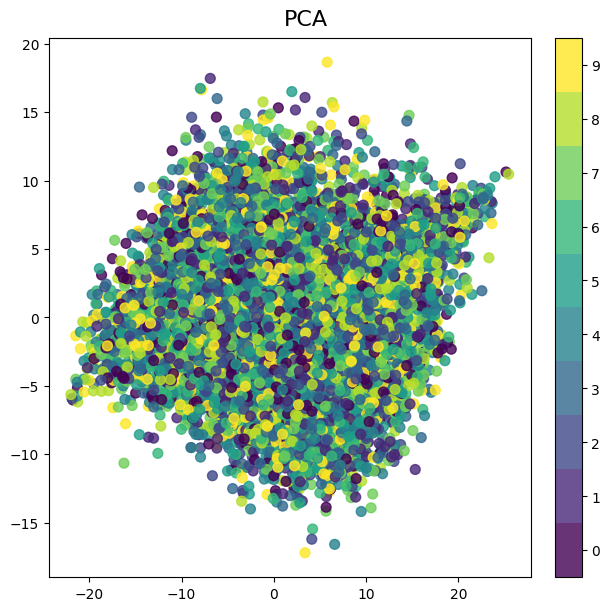

In [ ]:
# Apply Principle Component Analysis (PCA)
pca = PCA(n_components=n_components)
X_pca = pca.fit_transform(X)

plot_2d(X_pca, targets, "PCA")

**Isomap Embedding** is a technique used for dimensionality reduction and nonlinear manifold learning. It stands for Isometric Mapping of a Manifold, in the chart, each data point is connected to its nearest neighbors, the dimention is reducted to 2 and nn is 12.

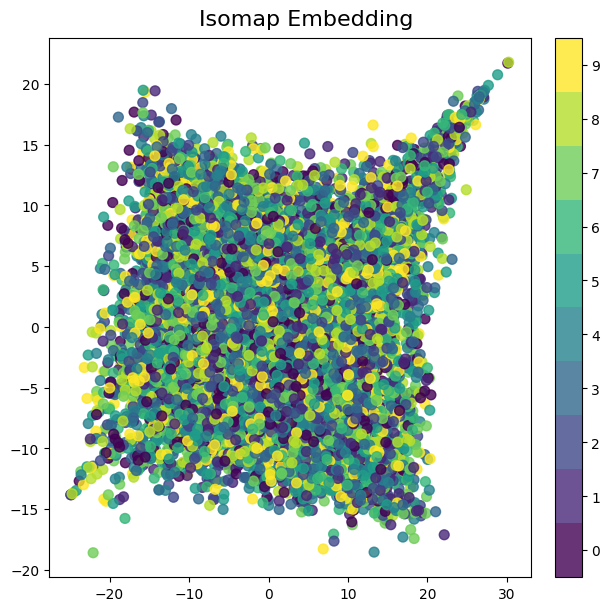

In [ ]:
# Apply Isomap Embedding
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_pca)

plot_2d(S_isomap, targets, "Isomap Embedding")

**Locally Linear Embedding (LLE)** is a nonlinear dimensionality similar to ISOMAP, For each data point, LLE computes the weights (or coefficients) that best reconstruct the data point as a linear combination of its neighbors.

One issue with LLE is the regularization problem. the matrix that define each local neighboris rank- deficient when the number of neighbors is greater than the input dimensions.

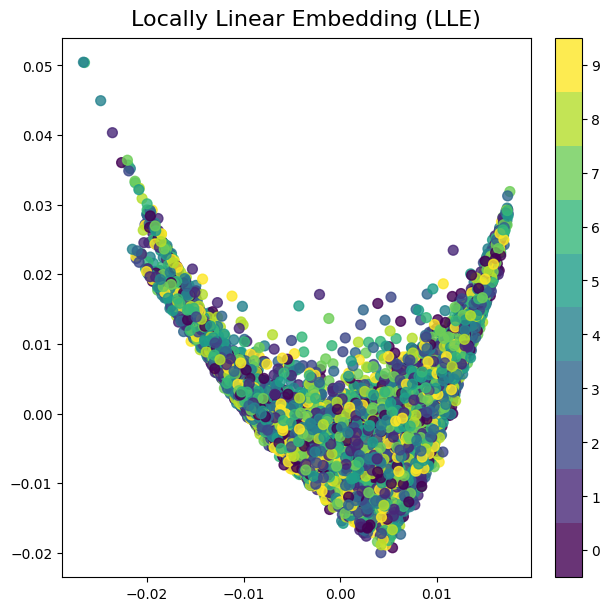

In [ ]:
# Apply Locally Linear Embedding (LLE)
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components)
X_lle = lle.fit_transform(X)

plot_2d(X_lle, targets, "Locally Linear Embedding (LLE)")

**Spectral Embedding** starts by constructing a graph representation of the data, then, computes the graph Laplacian matrix, which is a mathematical representation of the graph structure.

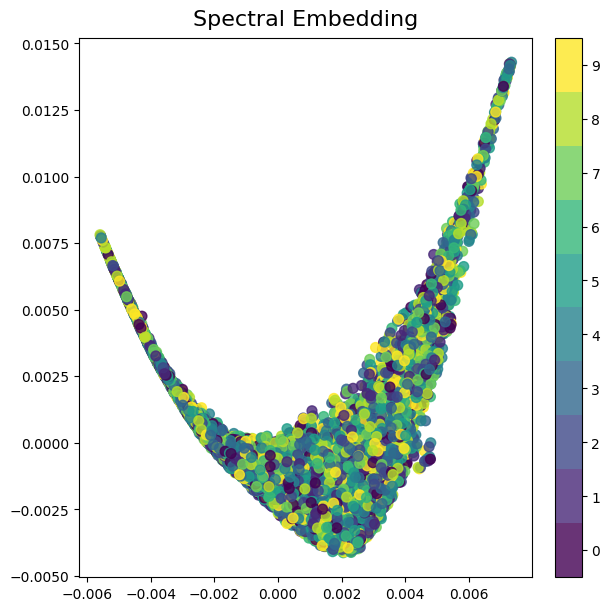

In [ ]:
# Apply Spectral Embedding
spectral = SpectralEmbedding(n_components=n_components, n_neighbors=n_neighbors, random_state=42)
X_spectral = spectral.fit_transform(X)

plot_2d(X_spectral, targets, "Spectral Embedding")

**t-Distributed Stochastic Neighbor Embedding (t-SNE)** is a nonlinear dimensionality reduction technique, it measures the pairwise similarity between data points using a Gaussian probability distribution centered on each data point

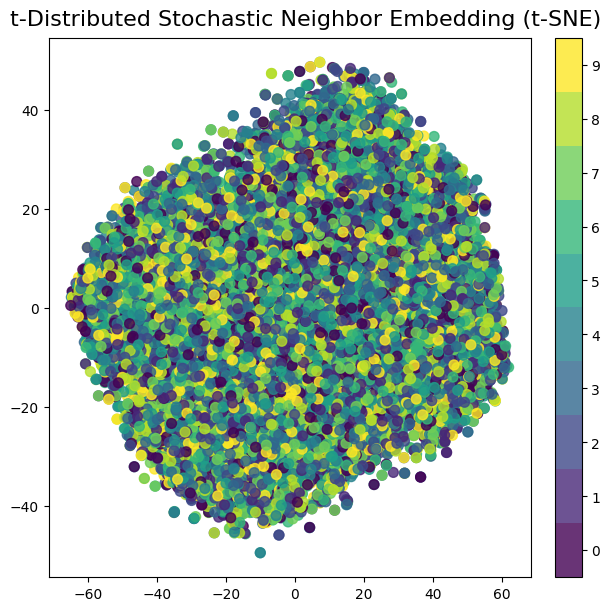

In [ ]:
# Apply t-Distributed Stochastic Neighbor Embedding (t-SNE)
tsne = TSNE(n_components=n_components)
X_tsne = tsne.fit_transform(X)

plot_2d(X_tsne, targets, "t-Distributed Stochastic Neighbor Embedding (t-SNE)")

In [ ]:
!pip install umap-learn

**Uniform Manifold Approximation and Projection (UMAP)** nonlinear dimensionality reduction,

visualization, and clustering of high-dimensional data, it preserves both local and global structure in the data.

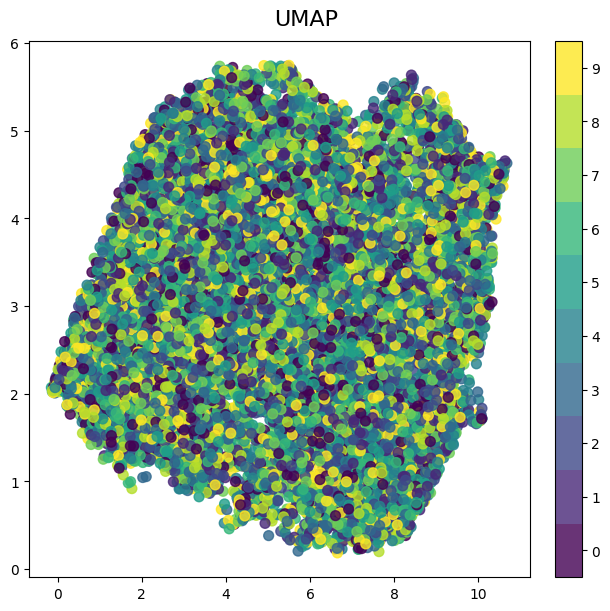

In [ ]:
import umap.umap_ as umap

# UMAP transformation
umap_model = umap.UMAP(n_components=n_components)
X_umap = umap_model.fit_transform(X)

plot_2d(X_umap, targets, "UMAP")

**Multidimensional Scaling (MDS)** is a dimensionality reduction technique used to visualize distances between data points in a lower-dimensional space while preserving their relative distances as much as possible.

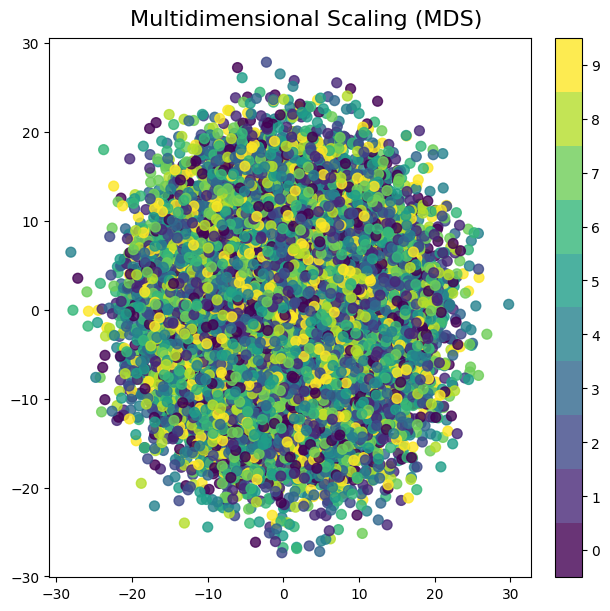

In [ ]:
# Apply Multidimensional Scaling (MDS)
mds = MDS(n_components=n_components, n_init=1, max_iter=50, normalized_stress=False)
X_mds = mds.fit_transform(X)

plot_2d(X_mds, targets, "Multidimensional Scaling (MDS)")

**CONCLUSIONS**

Graphs generated using manifold learning techniques aim to visualize and understand the structure of high-dimensional data in a lower dimensionality space, which helps to identify patterns, clusters, relationships and trends that are not discernible in the original high-dimensional space.


The manifold Learning methods that represents a better structure and order are UMAP, LLE, SpectralEmbedding and t-SNE, the distributtion is ordered, however, every method represents different information, Gaussian probability, or Spectral Eigenvalues.


Every manifold Learning method states the ten different classes according to the unique values of the target regardless of color.

Bibliography

In-Depth: Manifold Learning. Information taken from https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html


Manifold learning. https://scikit-learn.org/stable/modules/manifold.html

How to Use UMAP. https://umap-learn.readthedocs.io/en/latest/basic_usage.html

Some code structures base on examples of ChatGPT 3.5